In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
%matplotlib inline

In [2]:
infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz.out"
#infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs_top2000.out"
#szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz_top2000.out"
z_array = np.arange(0.0050,2.1100,0.0100) #this is the grid output by BPZ for my runs
z_trues = np.loadtxt(szfile,skiprows=1)
alldata = np.loadtxt(infile,skiprows=1)
ID = alldata[:,0]
pzs = alldata[:,1:]
ngals = len(ID)
print ngals

111171


In [3]:
approx_pdf = qp.Ensemble(pzs.shape[0],gridded=(z_array,pzs))

Ensemble has an integrate function that takes a ndarray of limits for each, or a tuple if the same for all
for PIT, need the ndarray to be 0.0 to zspec for each galaxy

In [4]:
alllimits = np.zeros([ngals,2])
for i in range(ngals):
    alllimits[i,1] = z_trues[i]
print alllimits

[[ 0.     0.038]
 [ 0.     0.058]
 [ 0.     0.064]
 ..., 
 [ 0.     1.895]
 [ 0.     1.891]
 [ 0.     1.97 ]]


In [5]:
PIT = approx_pdf.integrate(limits=alllimits,using='gridded',dx=0.001)

In [6]:
print len(PIT)

111171


In [7]:
npct = 100
dpct = 100./(npct)
curpct = 0.0
finpct = []
percentiles = np.arange(0,100,dpct)
for i in range(npct):
    tmpx = np.percentile(PIT,curpct)
    finpct.append(tmpx)
    curpct += dpct

In [8]:
QT = percentiles/100.

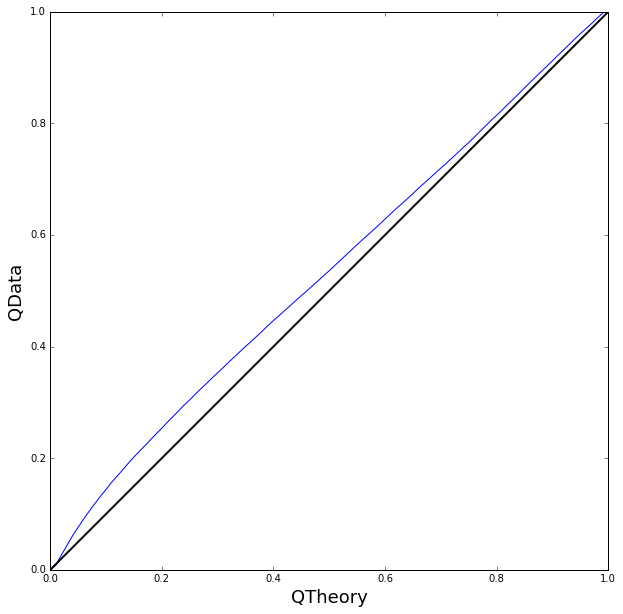

In [9]:
plt.figure(figsize=(10,10))
plt.plot(QT,finpct)
plt.plot([0,1], [0, 1], color='k', linestyle='-', linewidth=2)
plt.xlabel("QTheory",fontsize=18)
plt.ylabel("QData",fontsize=18)